In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
test = pd.read_csv('/Users/bhavithakandru/Desktop/titanic/test.csv')
train = pd.read_csv('/Users/bhavithakandru/Desktop/titanic/train.csv')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

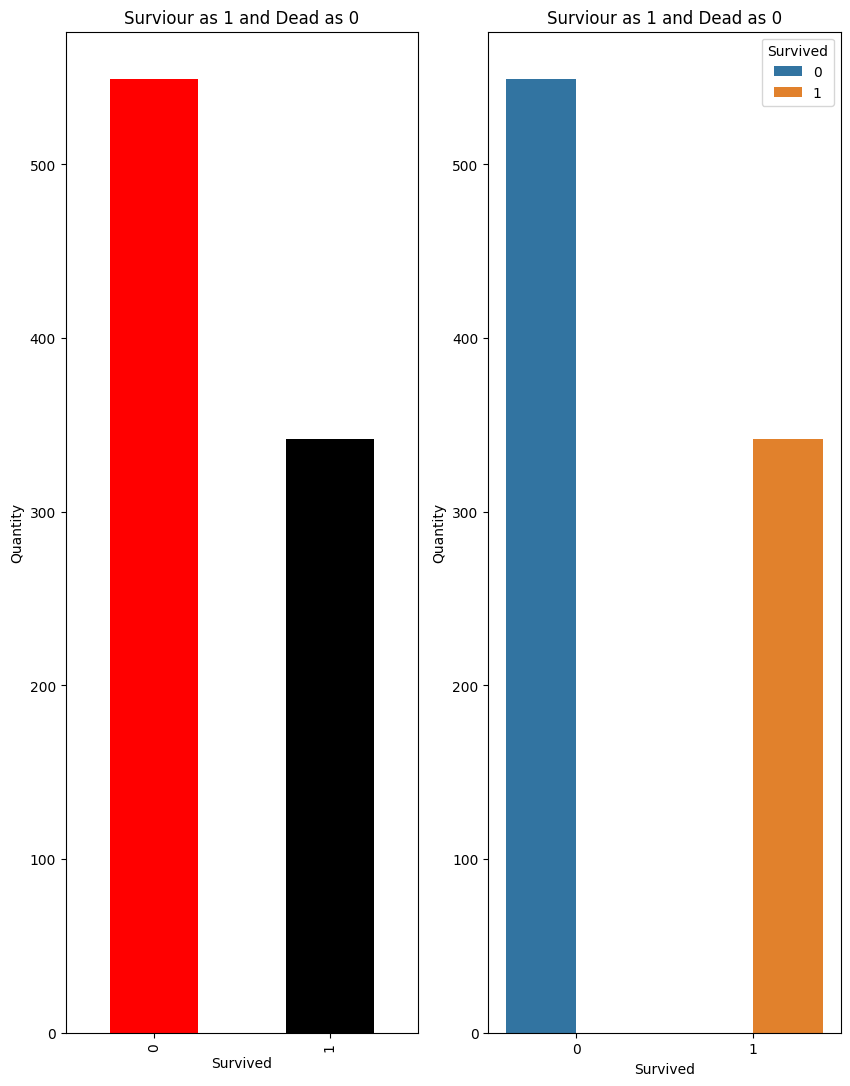

In [9]:
fig,ax = plt.subplots(1,2,figsize=(10,13))
train['Survived'].value_counts().plot.bar(
    ax = ax[0], 
    color=['red','black'],
)
ax[0].set_title('Surviour as 1 and Dead as 0'),
ax[0].set_ylabel('Quantity'),
sns.countplot(x='Survived', data=train, ax=ax[1], hue='Survived')
ax[1].set_title('Surviour as 1 and Dead as 0')
ax[1].set_ylabel('Quantity')
plt.show()


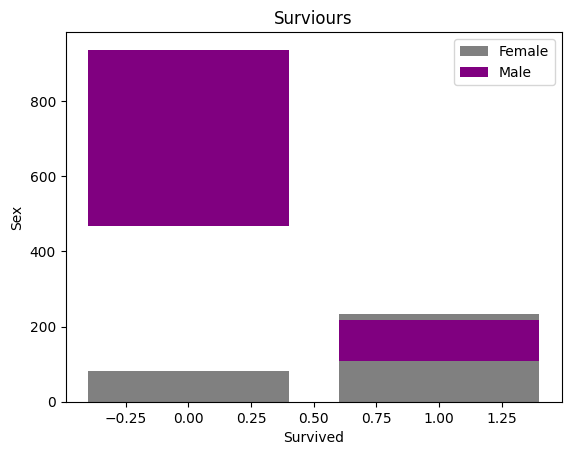

In [10]:
females = train[train['Sex']=='female']['Survived'].value_counts()
males = train[train['Sex']=='male']['Survived'].value_counts()
plt.bar(x=females.index,height=females.values,color='grey')
plt.bar(x=males.index,height=males.values,bottom=males.values,color='purple')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.title('Surviours')
plt.legend(['Female','Male']);

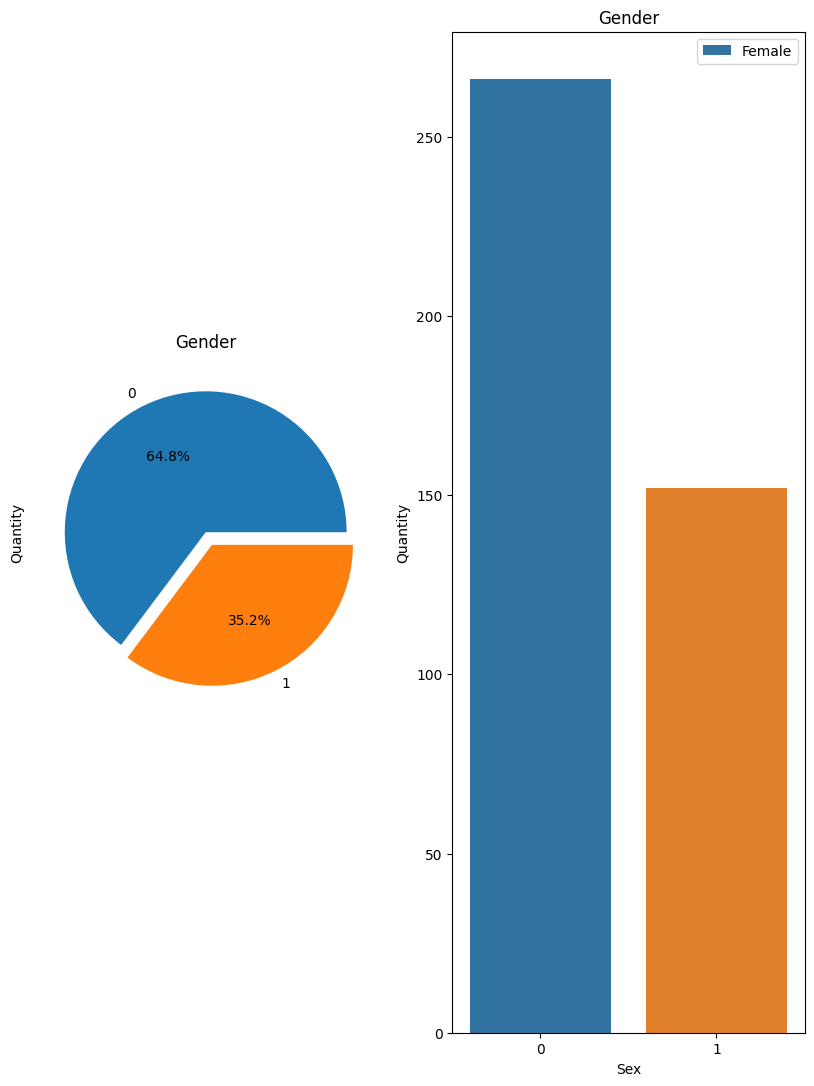

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 13))

# Plotting the first bar plot
train['Sex'].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%', shadow =False,ax=ax[0])
width=0.5,  # Adjust the width of the bars to add spacing

ax[0].set_title('Gender')
ax[0].set_ylabel('Quantity')

# Plotting the second bar plot with seaborn countplot
sns.countplot(x='Sex', data=test, ax=ax[1])
ax[1].set_title('Gender')
ax[1].set_ylabel('Quantity')
plt.legend(['Female','Male']);

plt.show()


In [15]:
train['Embarked'].isnull().sum()

2

In [16]:
import numpy as np
train['Age']=train['Age'].fillna(-0.5)
test['Age']=test['Age'].fillna(-0.5)
bins =[-1,0,5,10,18,24,35,60,np.inf]
labels = ['Unknown','Infant','Baby','Child','Teen','Young','Adult','Old']
train['Age_group']=pd.cut(train['Age'],bins=bins,labels=labels) 
test['Age_group']=pd.cut(test['Age'],bins=bins,labels=labels)
train['Age_group'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0         Teen
1        Adult
2        Young
3        Young
4        Young
        ...   
886      Young
887       Teen
888    Unknown
889      Young
890      Young
Name: Age_group, Length: 891, dtype: category
Categories (8, object): ['Unknown' < 'Infant' < 'Baby' < 'Child' < 'Teen' < 'Young' < 'Adult' < 'Old']>

In [17]:
combine = [test,train]
for i in combine:
    i['Title']=i.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    pd.crosstab(train['Name'],train['Sex'])

In [19]:
for i in combine:
    i['Title']=i['Title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona','Rare'])
    i['Title']=i['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    i['Title']=i['Title'].replace('Mlle','Miss')
    i['Title']=i['Title'].replace('Ms','Miss')
    i['Title']=i['Title'].replace('Mme','Mrs')
    train[['Title','Survived']].groupby(['Title'],as_index=False).mean()
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3,
                 "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
i['Title']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    0.0
890    0.0
Name: Title, Length: 891, dtype: float64

In [20]:
sex_mapping = {'Male':0,'Female':1}
train['Sex']=train['Sex'].map(sex_mapping)
test['Sex']=test['Sex'].map(sex_mapping)

embark_mapping={'S':1,'C':2,'Q':3}
train['Embarked']=train['Embarked'].map(embark_mapping)
test['Embarked']=test['Embarked'].map(embark_mapping)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Title
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,1.0,Teen,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,2.0,Adult,0.0
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,Young,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,1.0,Young,0.0
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,1.0,Young,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",NaN,27.0,0,0,211536,13.0000,NaN,1.0,Young,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",NaN,19.0,0,0,112053,30.0000,B42,1.0,Teen,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,-0.5,1,2,W./C. 6607,23.4500,NaN,1.0,Unknown,0.0
889,890,1,1,"Behr, Mr. Karl Howell",NaN,26.0,0,0,111369,30.0000,C148,2.0,Young,0.0


In [46]:
train = train.drop(['Fare','Name','Age','PassengerId'],axis=1)
test = test.drop(['Fare','Name','Age', 'PassengerId'],axis=1)

In [47]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [49]:
from sklearn.model_selection import train_test_split
predictors = train.drop(['Survived'],axis=1)
target = train['Survived']
x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=0)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest =RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_val)

acc = round(accuracy_score(y_pred,y_val)*100,2)
acc

ValueError: could not convert string to float: 'C.A. 18723'

In [51]:
ids = test['PassengerId']
predictions = random_forest.predict(test.drop('PassengerId', axis=1))

# set the output as a dataframe and convert
# to csv file named resultfile.csv
#output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
#output.to_csv('resultfile.csv', index=False)


KeyError: 'PassengerId'